# Assignment (24th March) : Exploratory Data Analysis - 1

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

**ANS:** Key features of the wine quality dataset include:

1. **Fixed Acidity**
2. **Volatile Acidity**
3. **Citric Acid**
4. **Residual Sugar**
5. **Chlorides**
6. **Free Sulfur Dioxide**
7. **Total Sulfur Dioxide**
8. **Density**
9. **pH**
10. **Sulphates**
11. **Alcohol**

Each feature influences wine quality by affecting taste, aroma, and preservation. For example, higher acidity can enhance freshness, while higher alcohol content usually correlates with better quality.

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

**ANS:** To handle missing data in the wine quality dataset:

1. **Mean/Median Imputation:** Replaces missing values with the mean/median of the column.
   - **Advantages:** Simple and quick.
   - **Disadvantages:** Can distort data distribution and reduce variability.
   

2. **K-Nearest Neighbors (KNN):** Replaces missing values based on the values of the nearest neighbors.
   - **Advantages:** More accurate and maintains data relationships.
   - **Disadvantages:** Computationally expensive and sensitive to outliers.


3. **Regression Imputation:** Uses regression models to predict and fill missing values.
   - **Advantages:** Maintains relationships between variables.
   - **Disadvantages:** Complex and requires careful model selection.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

**ANS:** Key factors affecting students' performance in exams include:

1. **Study Habits**
2. **Attendance**
3. **Socioeconomic Status**
4. **Parental Involvement**
5. **Teacher Quality**
6. **Sleep and Nutrition**

To analyze these factors:

1. **Descriptive Statistics:** Summarize data (mean, median, mode).
2. **Correlation Analysis:** Identify relationships between variables.
3. **Regression Analysis:** Determine the impact of each factor on performance.
4. **ANOVA:** Compare performance across different groups (e.g., socioeconomic status).
5. **Factor Analysis:** Identify underlying variables that explain the data.

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

**ANS:** Feature engineering process for the student performance dataset:

1. **Data Cleaning:** Handle missing values and outliers.
2. **Feature Selection:** Choose relevant variables (e.g., study hours, attendance).
3. **Encoding Categorical Variables:** Convert categories to numerical values (e.g., one-hot encoding for parental education level).
4. **Scaling:** Standardize numerical features to a common scale.
5. **Creating New Features:** Generate interaction terms or aggregate features (e.g., total study hours per week).

Selection and transformation aimed to improve model performance and interpretability by focusing on variables with the most predictive power and ensuring numerical stability.

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

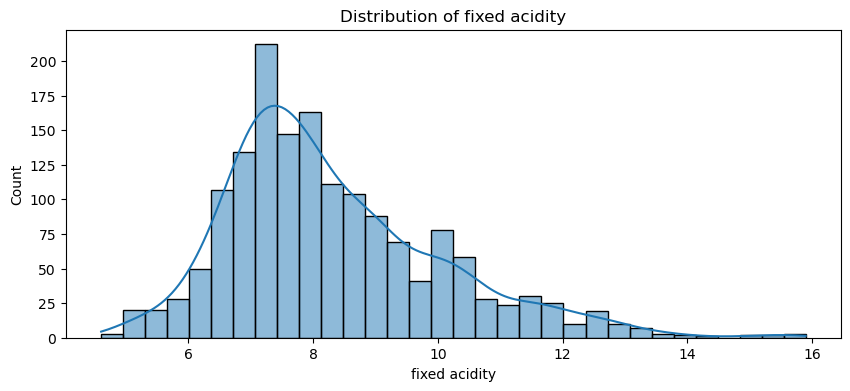

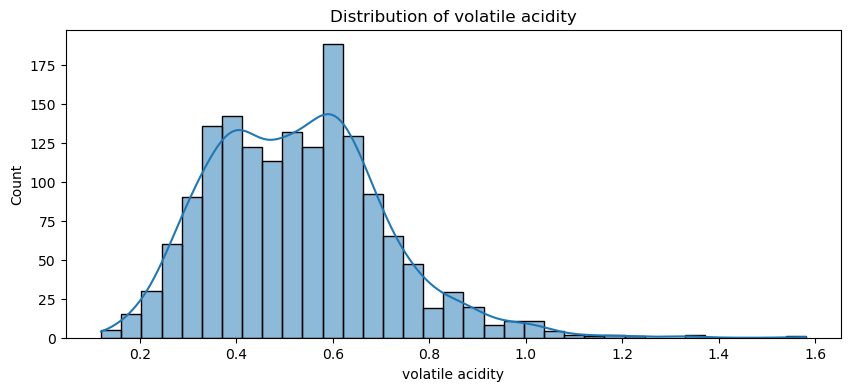

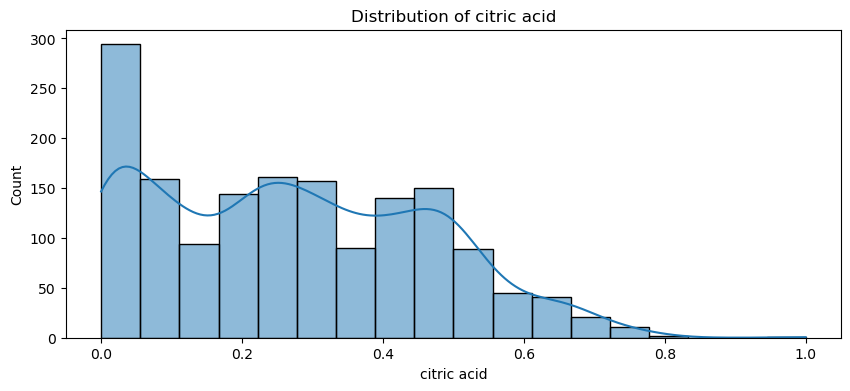

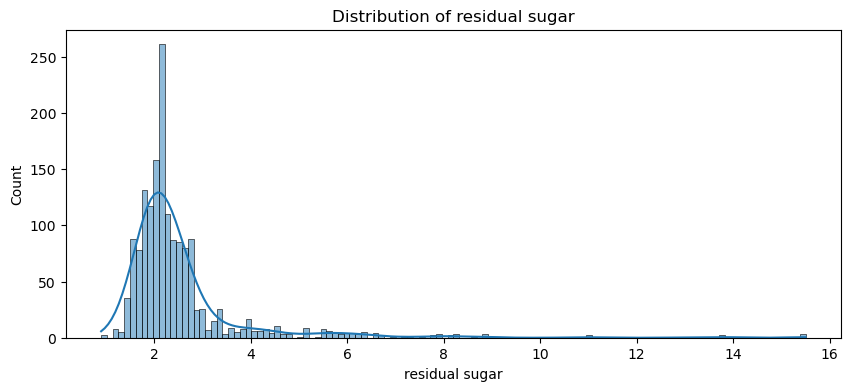

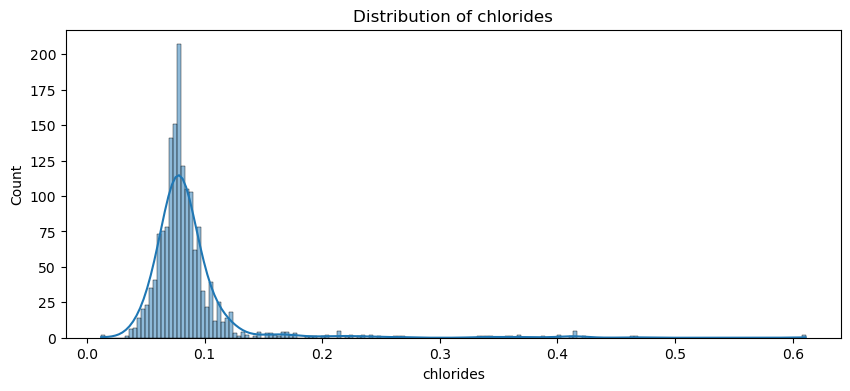

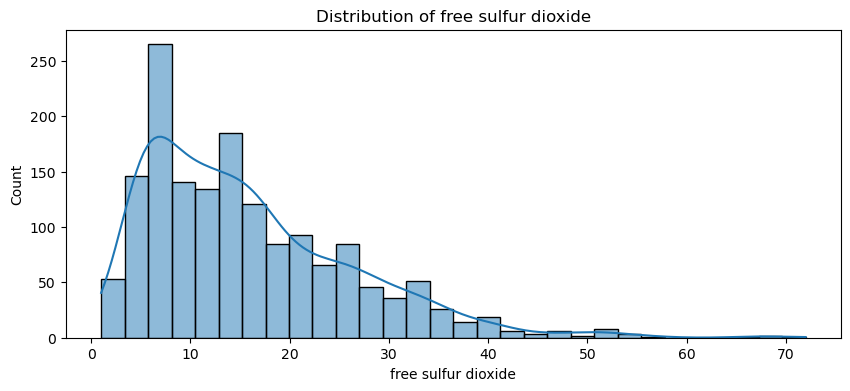

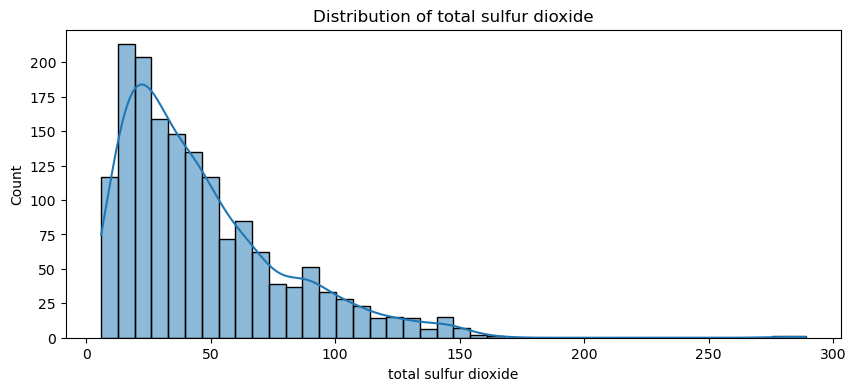

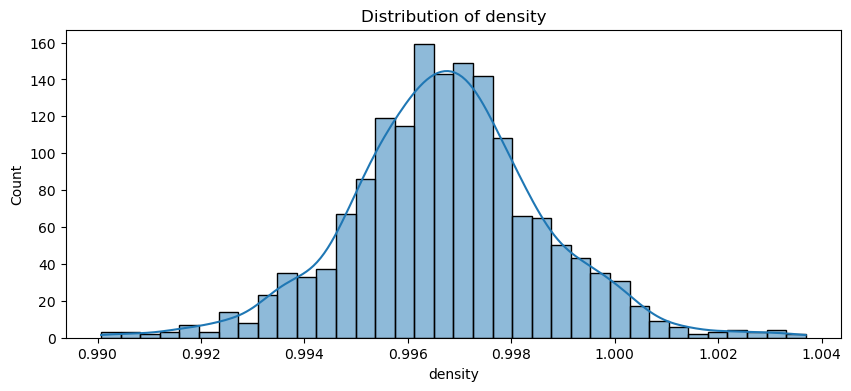

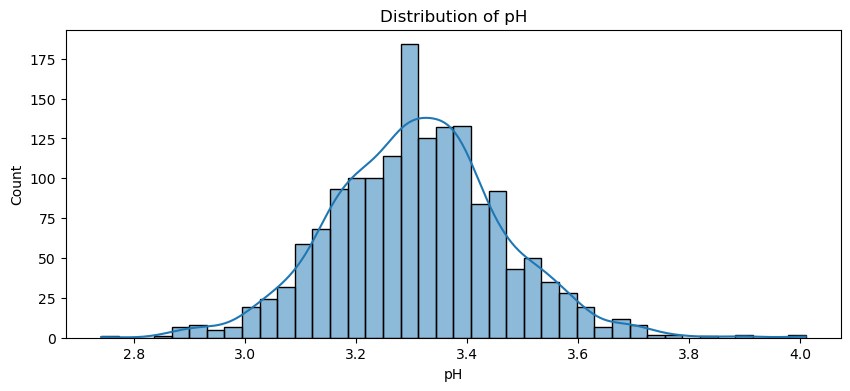

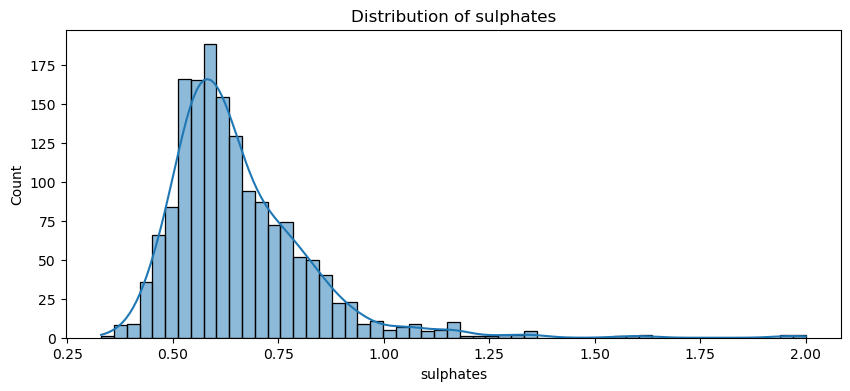

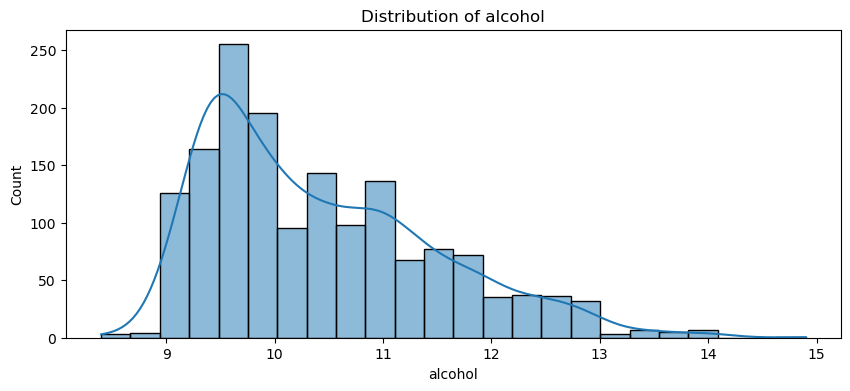

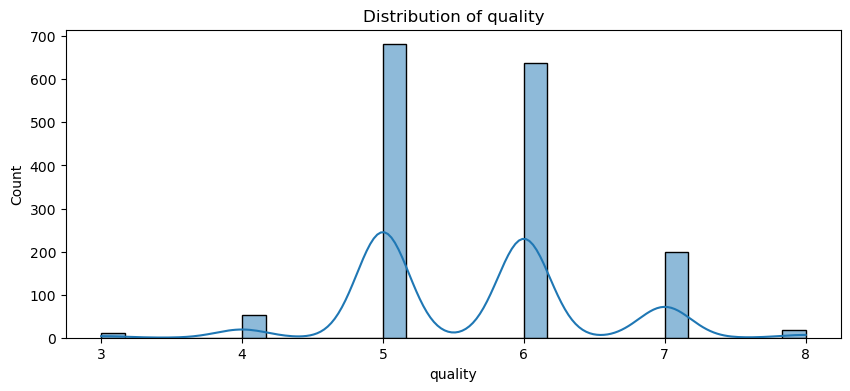

In [2]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox

# Load Data:
data = pd.read_csv('winequality-red.csv')


# Summary Statistics:
data.describe()

# Distribution Plots:
for column in data.columns:
   plt.figure(figsize=(10, 4))
   sns.histplot(data[column], kde=True)
   plt.title(f'Distribution of {column}')
   plt.show()


**Features exhibiting non-normality:**
- **Residual Sugar**
- **Chlorides**
- **Free Sulfur Dioxide**
- **Total Sulfur Dioxide**

In [7]:
# Transformations to improve normality:

# 1. Log Transformation: Suitable for skewed data.
data['residual sugar'] = data['residual sugar'].apply(lambda x: np.log(x + 1))

# 2. Box-Cox Transformation: Stabilizes variance and makes the data more normal.
data['chlorides'], _ = boxcox(data['chlorides'] + 1)

# 3. Square Root Transformation: Reduces right skewness.
data['free sulfur dioxide'] = data['free sulfur dioxide'].apply(np.sqrt)

#These transformations can help improve the normality of the features.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [8]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
# data = pd.read_csv('winequality-red.csv', delimiter=';')

In [9]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler
features = data.drop('quality', axis=1)  # Exclude target variable if present
scaled_features = StandardScaler().fit_transform(features)

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_features)
explained_variance = pca.explained_variance_ratio_.cumsum()

In [13]:
num_components = next(i for i, total_var in enumerate(explained_variance) if total_var >= 0.90) + 1
print(f'Minimum number of components to explain 90% variance: {num_components}')

Minimum number of components to explain 90% variance: 7
